# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
rbs = pd.read_csv('../Capstone_csv_file/rbs_final_salary_19-20')
rbs.head()

,NAME,final_rank,salary
0,Christian McCaffrey,1.0,4310326
1,Marlon Mack,2.0,704912
2,Joe Mixon,3.0,1362544
3,Saquon Barkley,4.0,7798688
4,Josh Jacobs,6.0,2983350


In [3]:
X = rbs['final_rank']
y = rbs['salary']

In [4]:
rbs['Mean_Yhat'] = rbs['salary'].mean()

In [5]:
 def MSE(y_true, y_pred):
    squared_error = 0
    for i in range(len(y_true)):
        squared_error += (y_true[i] - y_pred[i]) ** 2
    return squared_error / len(y_true)

In [6]:
MSE(y, rbs['Mean_Yhat'])

12790913814868.814

In [7]:
np.sqrt(MSE(y, rbs['Mean_Yhat']))

3576438.7055937103

In [8]:
def line_of_best_fit(x, y):

    y_bar = y.mean()
    x_bar = x.mean()
    std_y = y.std()
    std_x = x.std()
    r_xy = np.corrcoef(x, y)[0][1]

    beta_1 = r_xy * std_y / std_x
    beta_0 = y_bar - beta_1 * x_bar

    return beta_1 * x + beta_0

In [9]:
rbs['Linear_Yhat'] = line_of_best_fit(X, y)

In [10]:
rbs.head()

,NAME,final_rank,salary,Mean_Yhat,Linear_Yhat
0,Christian McCaffrey,1.0,4310326,3.113198e+06,3.862833e+06
1,Marlon Mack,2.0,704912,3.113198e+06,3.845426e+06
2,Joe Mixon,3.0,1362544,3.113198e+06,3.828018e+06
3,Saquon Barkley,4.0,7798688,3.113198e+06,3.810611e+06
4,Josh Jacobs,6.0,2983350,3.113198e+06,3.775797e+06


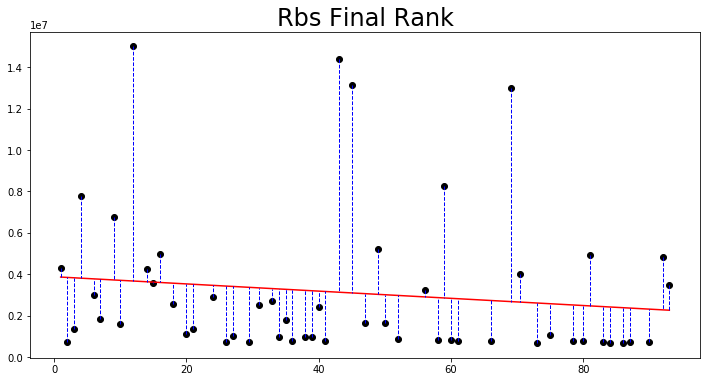

In [11]:
plt.figure(figsize=(12,6))

plt.scatter(X,
            y,
            color = 'black')

plt.plot(X,
         rbs['Linear_Yhat'],
         color = 'red')

for i, row in rbs.iterrows():
    plt.plot((row['final_rank'], row['final_rank']),
             (row['salary'], row['Linear_Yhat']),
             color = 'blue',
             linestyle = '--',
             lw=1)

    plt.title('Rbs Final Rank', fontsize = 24);

In [12]:
model = LinearRegression()

In [13]:
X = rbs[['final_rank']]
y = rbs['salary']

In [14]:
X.shape

(54, 1)

In [15]:
y.shape

(54,)

In [16]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred = model.predict(X)

In [18]:
np.sqrt(MSE(y, y_pred))

3543708.455093739

In [19]:
model.intercept_

3880239.794312085

In [20]:
model.coef_

array([-17407.12708252])

In [21]:
r2_score(y, y_pred)

0.01821951140778233